In [1]:
import netCDF4 as nc

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

from scipy import signal
import scipy

In [2]:
path = '/Users/zcaspar/codes/Diagnostics/'

### T=20d : Correlation functions for different part of the total signal removed (linear trend, average field (1d and 2), both)

In [5]:
corr = {}
removed = ['trend','avg1d + trend','avg1d','avg2d']
for name,data in zip(removed,
                     ['Lcorr_20.nc','drifters_corr_20avg1dd_ZC.nc','drifters_corr20_ZC.nc',
                      'drifters_corr_20avg2d_ZC.nc']):
    corr[name] = xr.open_dataset(path+data)
    for v in ['uu', 'vv']:
        corr[name][v+'_normalized'] = corr[name][v]/corr[name][v].sel(lag=0)
    for v in ['uv', 'vu']:
        corr[name][v+'_normalized'] = corr[name][v]/np.sqrt(corr[name]['uu'].sel(lag=0)*corr[name]['vv'].sel(lag=0))

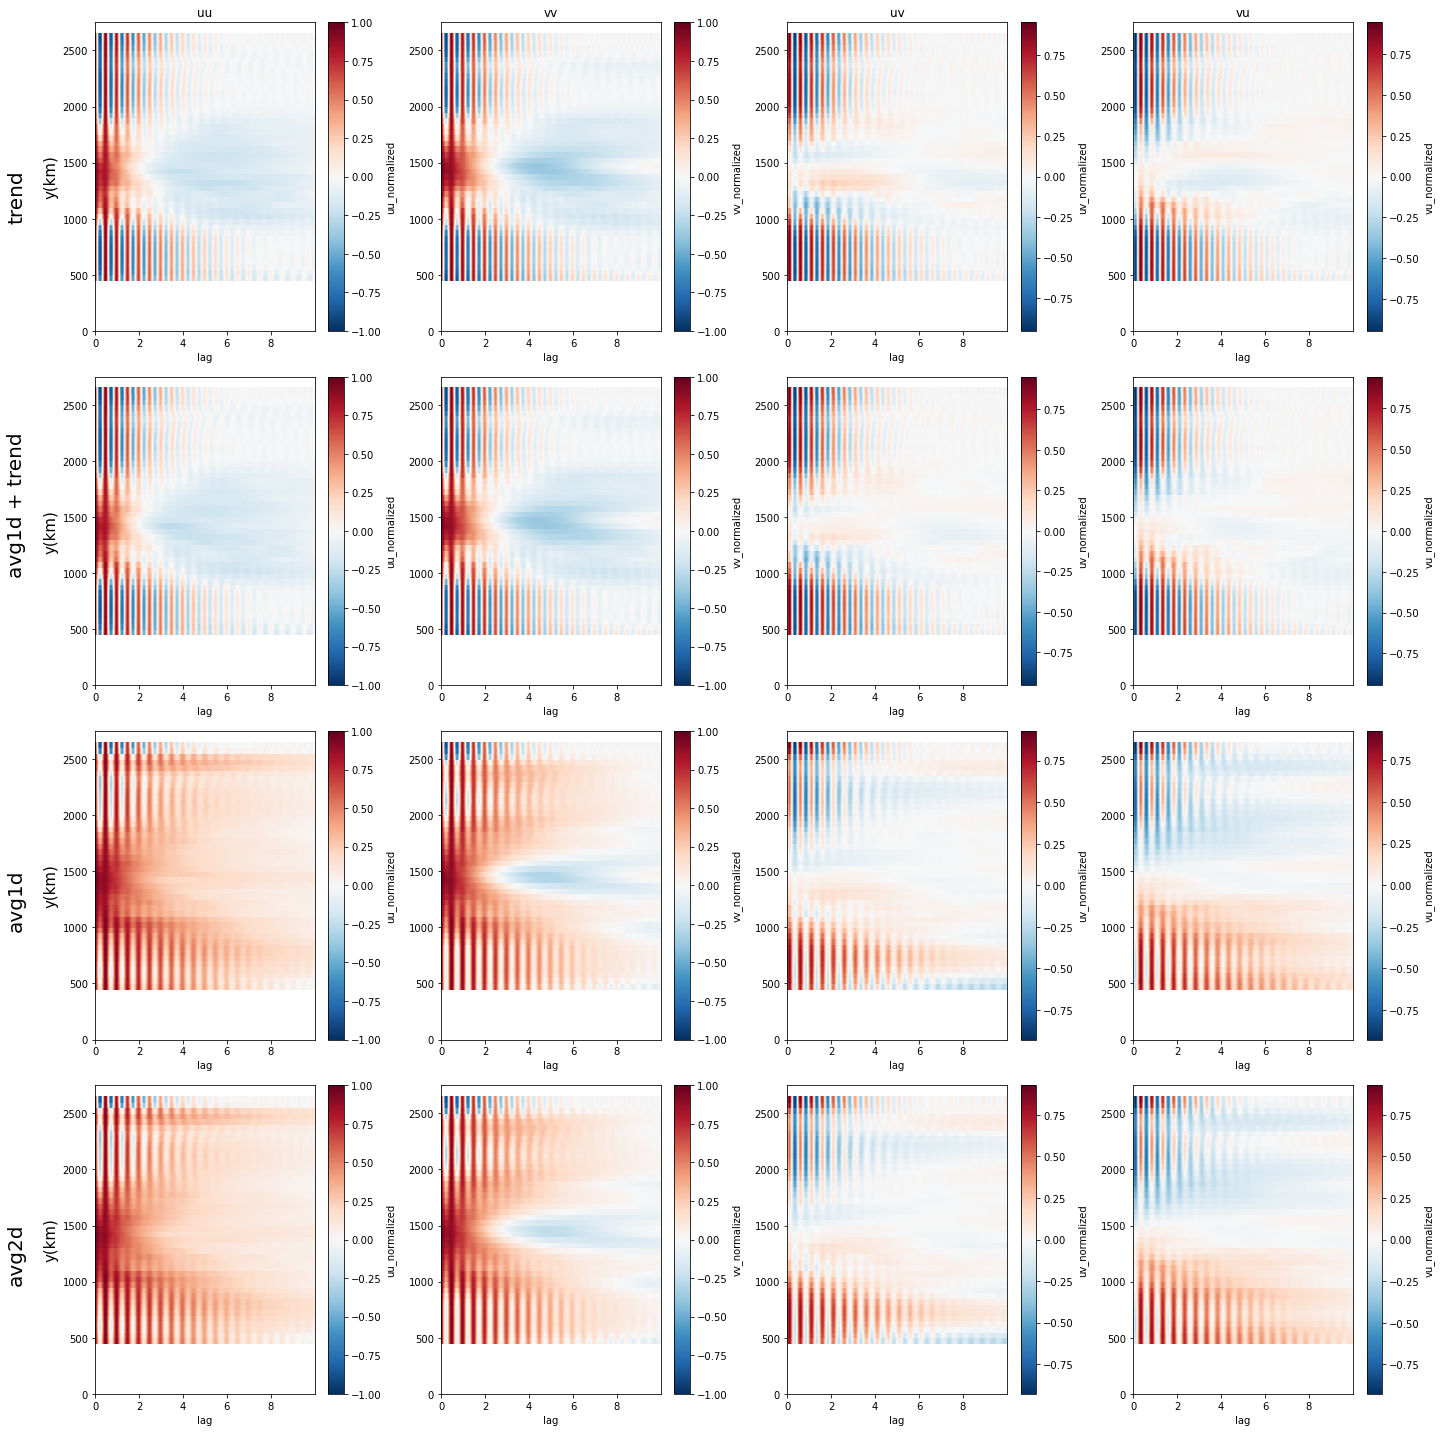

In [6]:
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corr[name][V+'_normalized'].plot(ax=ax);ax.set_ylabel('')
    axs[i,0].text(-4,1000,name,fontsize=20,rotation=90);axs[i,0].set_ylabel('y(km)',fontsize=15)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

#### Comments:
The negative lobe observed for the autocorrelation of u seems to be caused by the detrending since it is not observed when only an averaged field is removed to the signal.\
For v, the area where a negative lobe is narrower in the case where the average was removed.\
The slow component is more marked for the  average field. As expected, the detrending (for small time windows) seems to destroy a lot of the slow motions.\
No visually noticeable differences between the removal of the 1d  and the 2d averages are observed. 

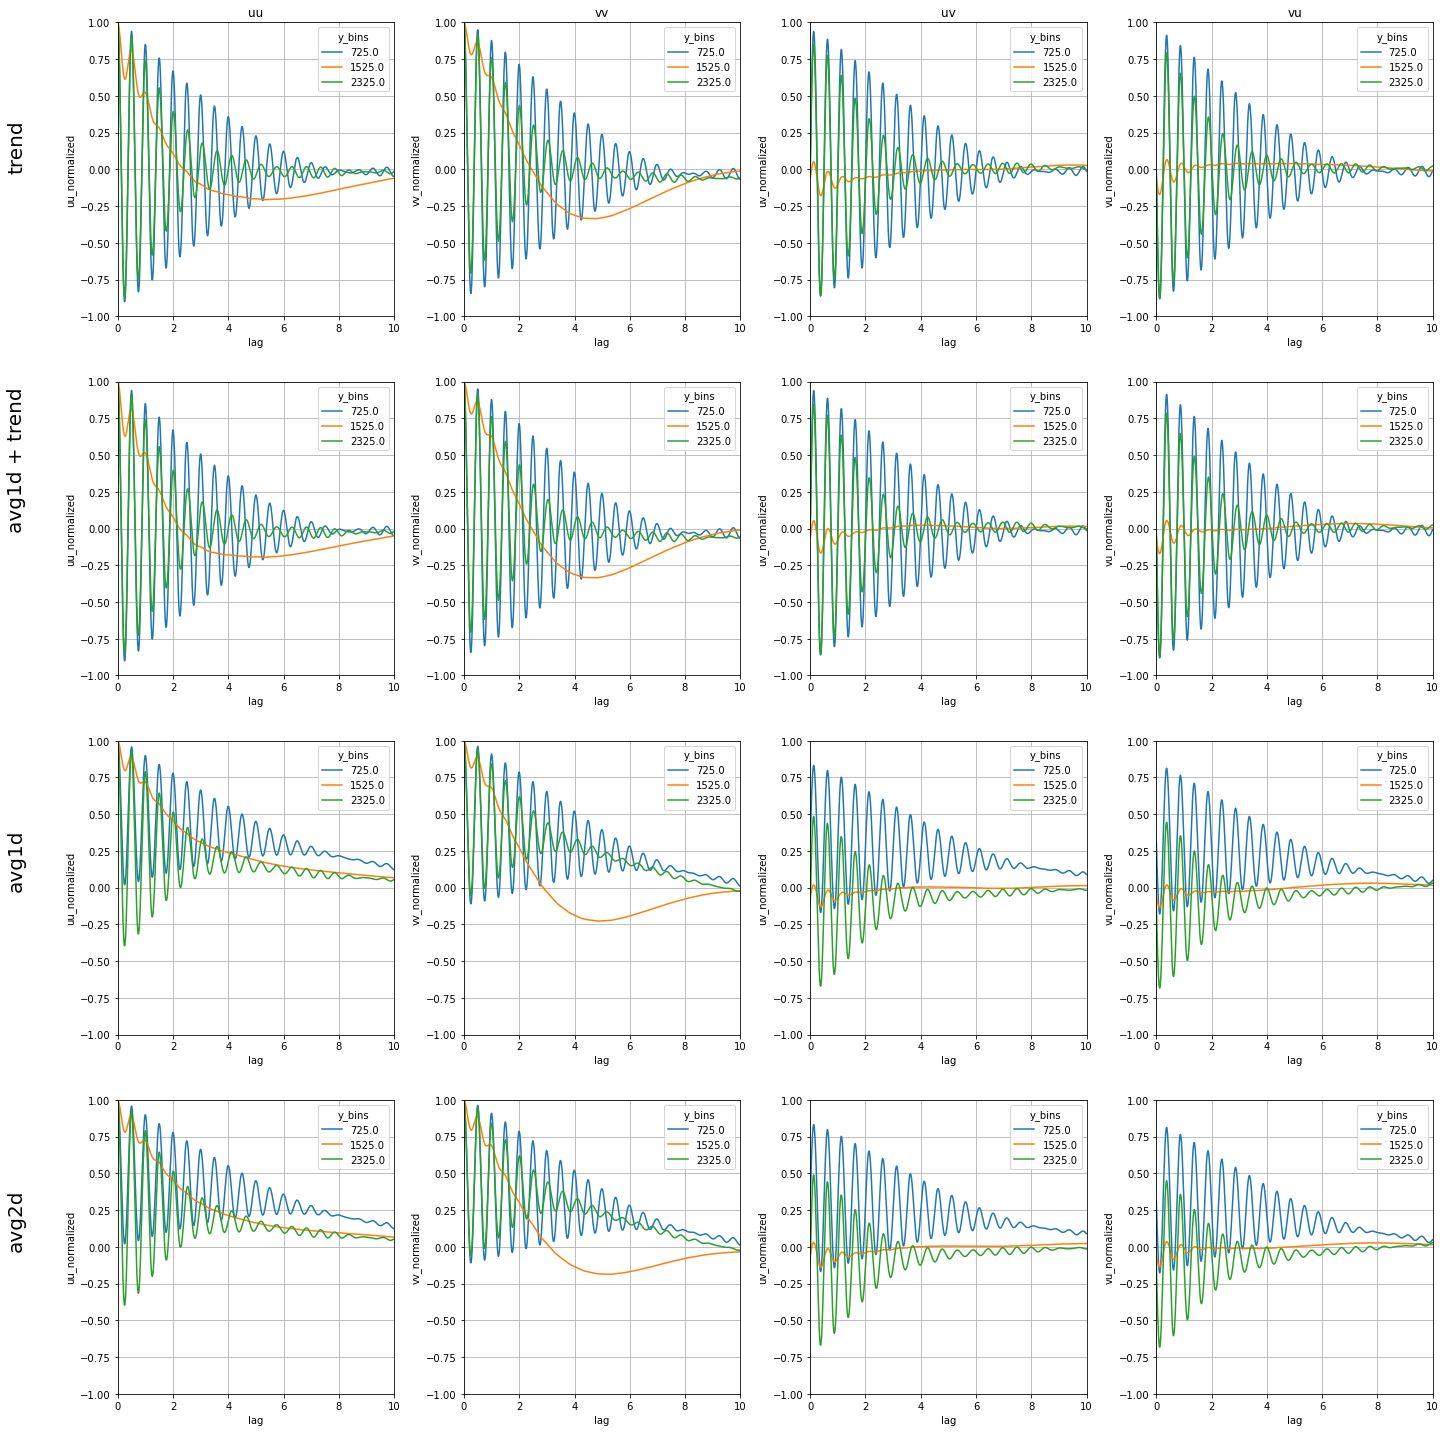

In [8]:
Y=[700,1500,2300]
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corr[name][V+'_normalized'].sel(y_bins=Y,method='nearest').plot(ax=ax, x='lag', hue='y_bins')
        ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid()
    axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments :
With detrending (1st 2 lines) : \
uu (in the jet) : negative lobe (min$\simeq$-0.2), sharp marks of fast motion for small lags ($\tau$<2)\
vv (in the jet) : same than for uu, with negative lobe more marked (min$\simeq$-0."3)\
uv and vu : cross correlation close to 0 in the jet

Only average removed (last 2 lines) : \
No visible differences btw 2d and 1d (to be confirmed)\
uu in the jet : no negative lobe, fast ocillations less marked than in the case of detrending\
vv in the jet : negative lobe but less marked than in the previous case (min$\simeq$-0.2)\
uv an vu : close to 0 in the jet; south and north of the domain, oscillations have smaller amplitudes than in the detrending case\
In all correlations, we observe nodes North and South of the domain while it is seen only south in the detrending case.

Overall, the most significant differences when changing from a detrending to the removal of an average field are the loss of a negative lobe in the autocorrelation of u and the decrease of the amplitudes of the fast oscillations in all correlation functions.

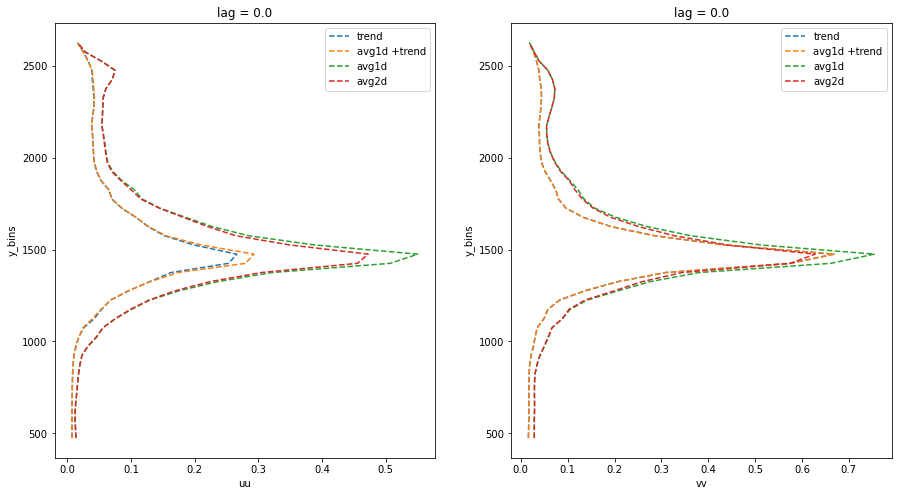

In [53]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
for V,ax in zip(['uu','vv'],axs):
    for name in removed:
        corr[name][V].sel(lag=0).plot.line('--',ax=ax,y='y_bins',label=name)
    ax.legend()

### Impact of the time window : detrending vs average field

In [10]:
corrT = {}
for name,data in zip(['trend20','trend80','avg20','avg80'],
                     ['Lcorr_20.nc','Lcorr_80','drifters_corr20_ZC.nc','drifters_corr_80avg1d_ZC.nc']):
    corrT[name] = xr.open_dataset(path+data)
    for v in ['uu', 'vv']:
        corrT[name][v+'_normalized'] = corrT[name][v]/corrT[name][v].sel(lag=0)
    for v in ['uv', 'vu']:
        corrT[name][v+'_normalized'] = corrT[name][v]/np.sqrt(corrT[name]['uu'].sel(lag=0)*corrT[name]['vv'].sel(lag=0))

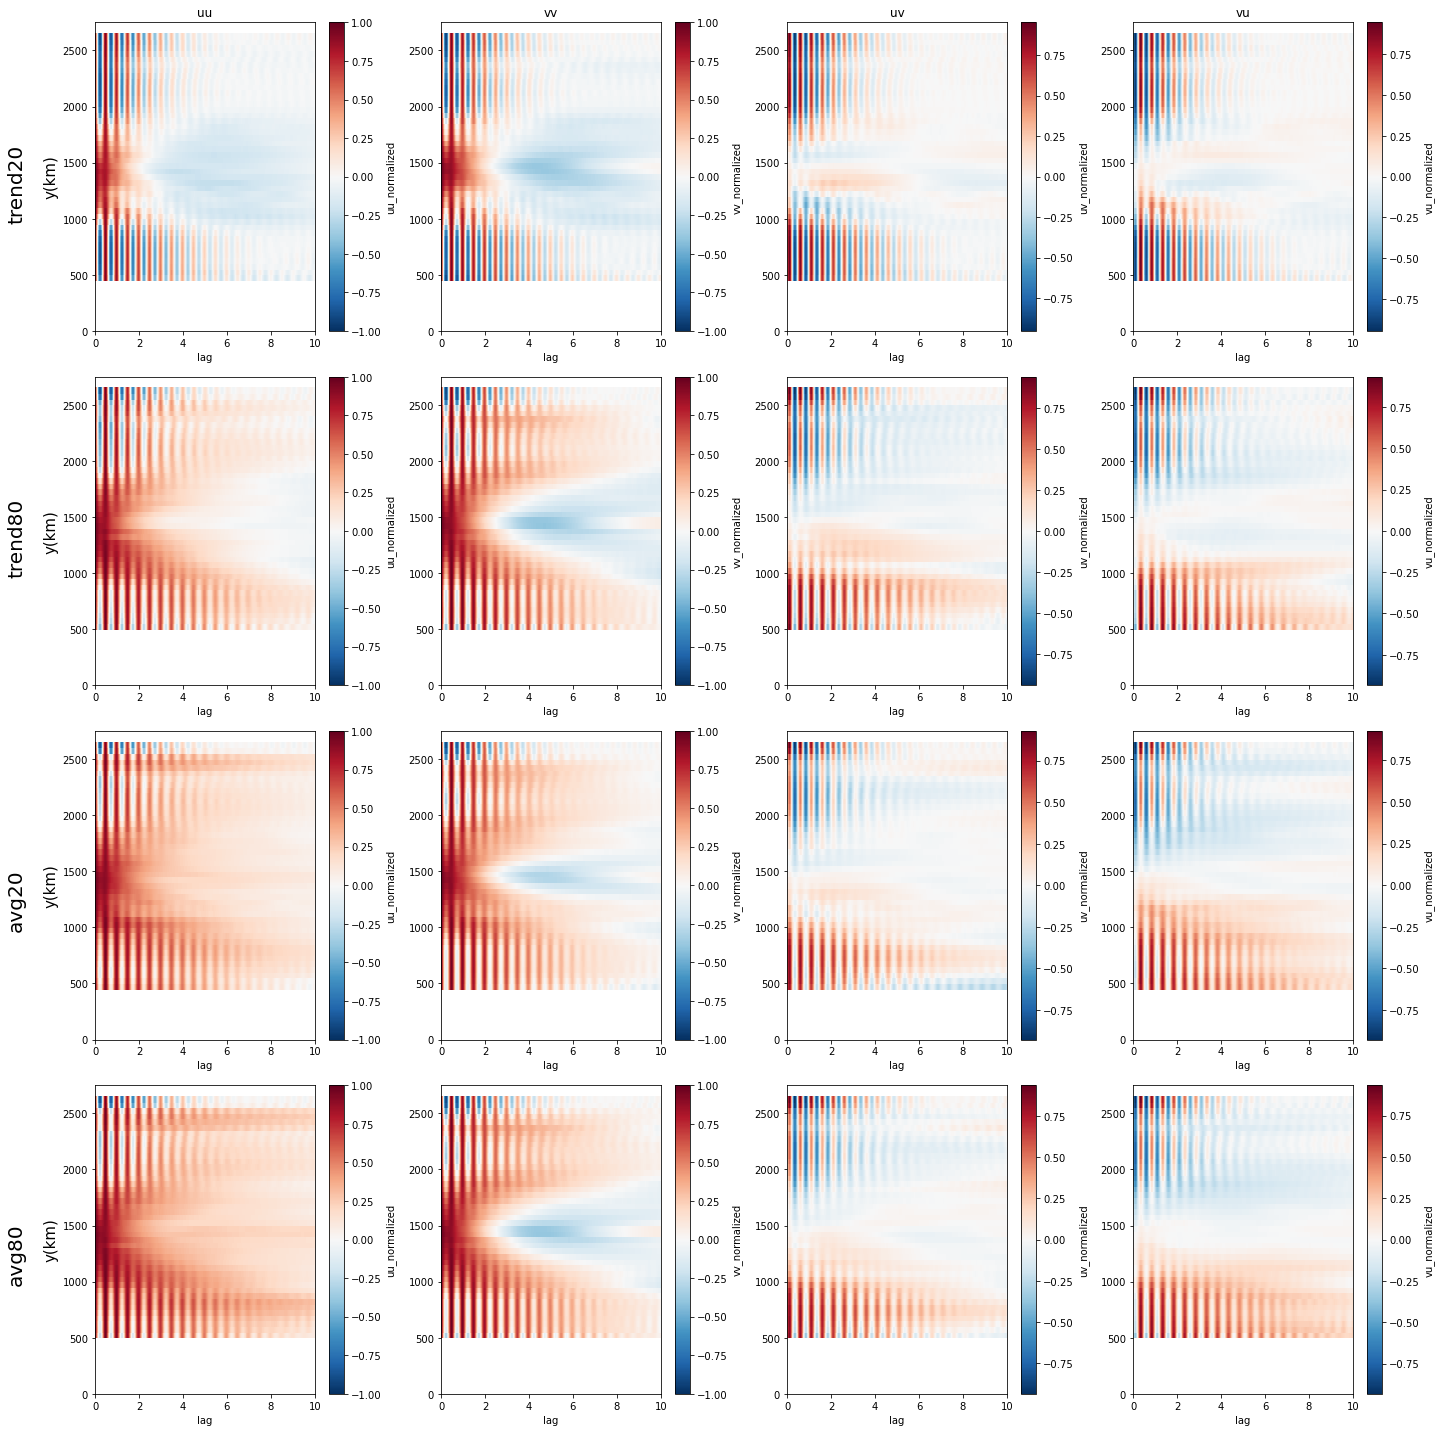

In [14]:
fig,axs = plt.subplots(len(['trend20','trend80','avg20','avg80']),4,figsize=(20,20))
for i,name in enumerate(['trend20','trend80','avg20','avg80']):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrT[name][V+'_normalized'].plot(ax=ax);ax.set_ylabel('');ax.set_xlim(0,10)
    axs[i,0].text(-4,1000,name,fontsize=20,rotation=90);axs[i,0].set_ylabel('y(km)',fontsize=15)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments : 
The detrending on larger time window seem to give results closer to the ones obtained with the avg. The negative lobe seems to remain but significantly decreased in uu.\
The negative lobe in vv is observed in all cases but in a narrower band of y for a larger T in the detrending and in both avg cases.\
For vv both autocorrelations for T=80d seem similar(for both detrending and avg)

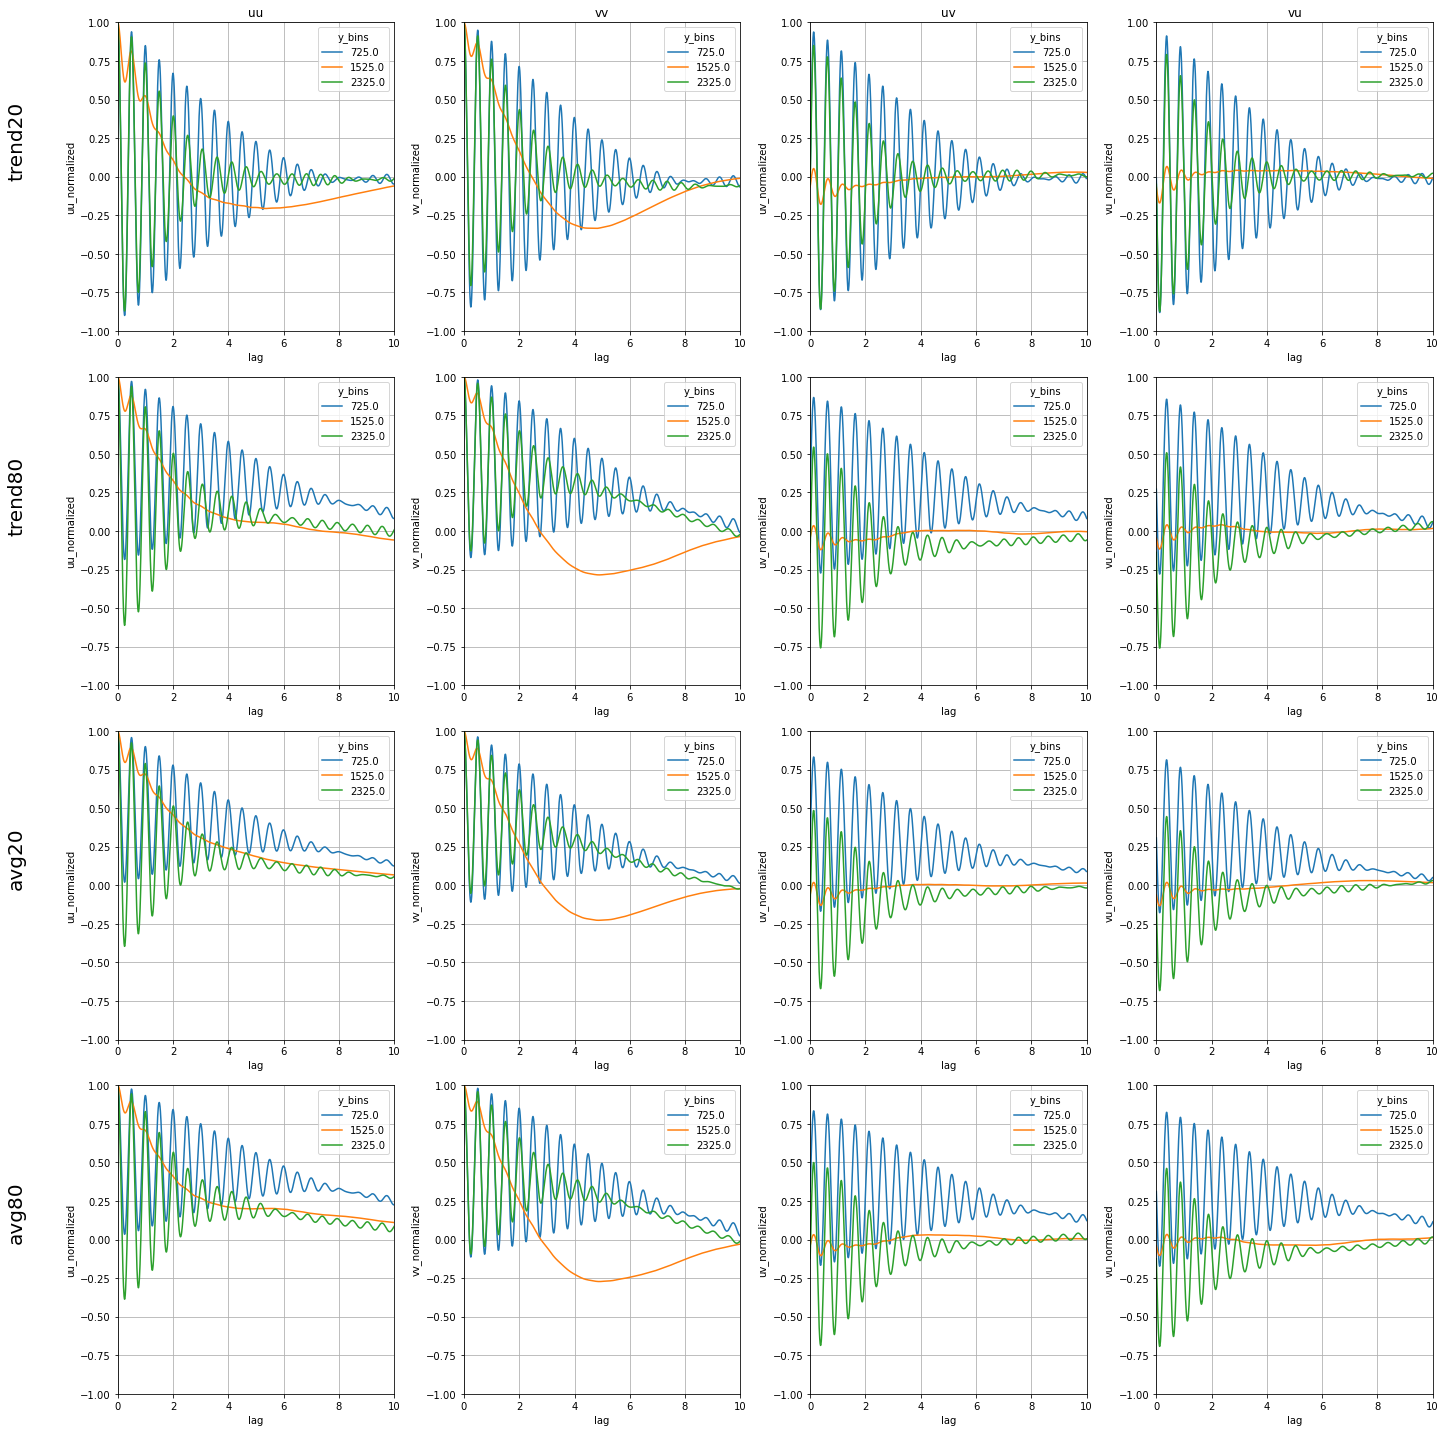

In [16]:
Y=[700,1500,2300]
fig,axs = plt.subplots(len(['trend20','trend80','avg20','avg80']),4,figsize=(20,20))
for i,name in enumerate(['trend20','trend80','avg20','avg80']):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corrT[name][V+'_normalized'].sel(y_bins=Y,method='nearest').plot(ax=ax, x='lag', hue='y_bins')
        ax.set_xlim(0,10);ax.set_ylim(-1,1);ax.grid()
    axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

### Comments : 
Detrending (T=20 and T=80, 1st 2 lines) : \
uu : in three areas, the fast oscillations have smaller amplitudes for T=80. For T=80, uu in the jet becommes negative for $\tau$<8 and there seems to a sharp change of slope around $\tau\simeq$6days. vv presents a more pronounced negative lobe (min<-0.25).

Avg (T=20 and T=80, last 2 lines) : \
Amplitudes of fast oscillations seem to remain unchanged by the increase of the time window. The time decorrelation in the South also seems to be the same. In the jet, same change of the slope in uu and decrease of the negative lobe in vv than the ones described previously, however no negative values (for $\tau$<10) of uu in this case. 

General comments : a larger time window allows more marks of the slow motion to be visible in the detrended case. The rate of amplitude of the slow component seem higher for the large time window with very similar form in the jet in both detrended and removed avg cases.\ In South, the tree last lines shows similar decorrelation timescales but higher amplitudes of fast oscillations in the detrended case (detrend+T=80, max ampl$\simeq$1.15 vs max ampl$\simeq$1 for both last cases).\
Time windows size => ratio slow component/fast component\
detrend/avg removal (for time windows large enough) => amplitudes of fast oscillations